# Stochastic Optimization

## 1.2 Simulated Annealing

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a>&nbsp;| Dennis G. Wilson | <a href="https://supaerodatascience.github.io/stochastic/">https://supaerodatascience.github.io/stochastic/</a>

In [1]:
from IPython.display import IFrame
IFrame("https://youtube.com/embed/skQRLfU3plM?start=530", 560, 315)

Simulated annealing is a stochastic search algorithm which improves on the idea of random optimization by basing the search not only on the best found state, but also on random states. To determine which states to accept, it uses a term called *temperature*. The algorithm is inspired by the process of metal annealing, where a metal must cool in a slow process to reach a desired hardened configuration of minimal energy.

<img src="imgs/Simulated_Annealing.gif">

Because simulated annealing is based on the metal cooling metaphor, the literature surrounding it often refers to fitness values in the search space as energies, where the objective is to minimize the energy (cool the metal) slowly. Arriving at a local minimum of energy by cooling too rapidly creates non-optimal atomic configurations of the metal, as is seen in real metals.

<img src="imgs/simulated_annealing.png">
Delahaye, Daniel, Supatcha Chaimatanan, and Marcel Mongeau. "Simulated annealing: From basics to applications." Handbook of Metaheuristics. Springer, Cham, 2019. 1-35.

## Simulated Annealing

Let $f: \mathbb{R}^n → \mathbb{R}$ be the fitness or cost function which must be minimized. Let $x ∈ \mathbb{R}^n$ designate a position or candidate solution in the search-space.

    Initialize x randomly in ℝ
    xbest = x
    for k in {0, kmax}
        x' = nearby(x)
        if f(x′) < f(x)
            x = x'
        else
            x = x' with probability P(f(x'), f(x), T)
        if f(x) < f(xbest)
            xbest = x
    return xbest

`nearby(x)` is a function which finds a point near X. This is a flexible definition, and we can continue to use the definition of $x' = x + N(0,1)$.

The acceptance probability that $x = x'$ if $f(x') > f(x)$ is the difference between simulated annealing and random optimization seen in the last notebook. This probability allows the search to move away from local optima, accepting worse solutions in order to explore more of the search space. This probability depends on 3 terms: $f(x'), f(x),$ and $T$, the temperature. A common probability is:

$e^\frac{-(f(x')-f(x))}{T}$

The temperature $T$ is the factor which determines the rate of exploration of the search space as opposed to exploitation of a specific optima. Often, the schedule used is to start with $T=1$ and to decrease at each time step to $T=\frac{(k_{max}-k)}{k_{max}}$

Let's see some acceptance probabilities for different values of $f(x')$ and $T$ when $f(x)=1$.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import math

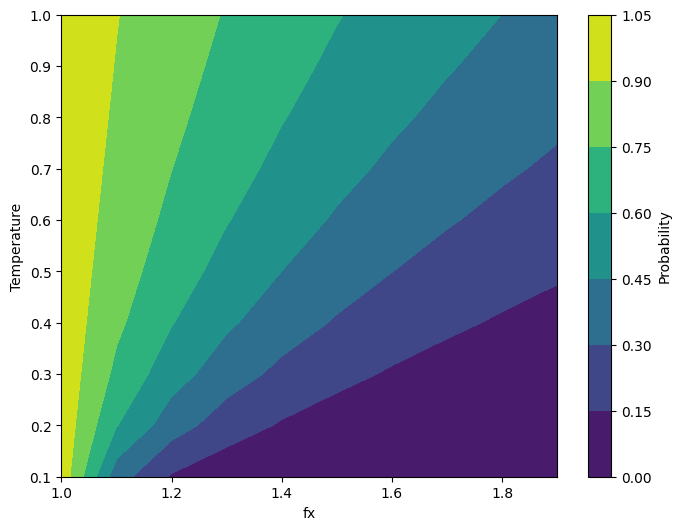

In [15]:
# Define a range of values for 'fx' and 'T' using NumPy's arange function.
fx = np.arange(1.0, 2.0, 0.1)
T = np.arange(1.0, 0.0, -0.1)

# Create a 2D grid of 'fx' and 'T' values using NumPy's meshgrid function.
X, Y = np.meshgrid(fx, T)

# Define a probability function 'proba' that takes 'fx' and 'T' as inputs.
proba = lambda fx, T: np.exp(-(fx - 1) / T)

# Evaluate the probability function 'proba' over the 2D grid of 'fx' and 'T' values.
Z = proba(X, Y)

# Create a Matplotlib figure with a specific size.
fig = plt.figure(figsize=(8, 6))

# Create a filled contour plot using 'plt.contourf'.
cs = plt.contourf(X, Y, Z)

# Add a colorbar to the figure to represent the color scale for the probability values.
cbar = fig.colorbar(cs)

# Set a label for the colorbar to describe what the colors represent.
cbar.set_label('Probability')

# Add labels for the X and Y axes.
plt.xlabel('fx')
plt.ylabel('Temperature')

# Display the plot.
plt.show()

As we can see, for high temperature values (ie the beginning of the search), there is a high probability to accept solutions which are worse than our current best. However, as the search continues and the temperature decreases, the chance of accepting higher values decreases.

For a summary, here is the version of simulated annealing we can use for continuous optimization. Note that the choice of neighbor function, acceptance probability function, and temperature schedule are all parameters in simulated annealing and we could choose other functions suited to specific problems.

## Continuous Optimization Simulated Annealing

Let $f: \mathbb{R}^n → \mathbb{R}$ be the fitness or cost function which must be minimized. Let $x ∈ \mathbb{R}^n$ designate a position or candidate solution in the search-space.

    Initialize x randomly in ℝ
    xbest = x
    for k in {0, kmax}
        x' = x + N(0, 1)
        T = (kmax - k) / kmax
        if (f(x′) < f(x)) or (exp(-(f(x')-f(x))/T) > rand())
            x = x'
            if f(x) < f(xbest)
                xbest = x
    return xbest

<div class="alert alert-success">
    <h3>Exercise 3</h3>
Implement simulated annealing and compare it to random search. Does the acceptance probability help? Try tracking when it is used to see if more transitions are accepted early in the search. Compare random search and simulated annealing on the Himmelblau function. Are the conclusions different?
</div>

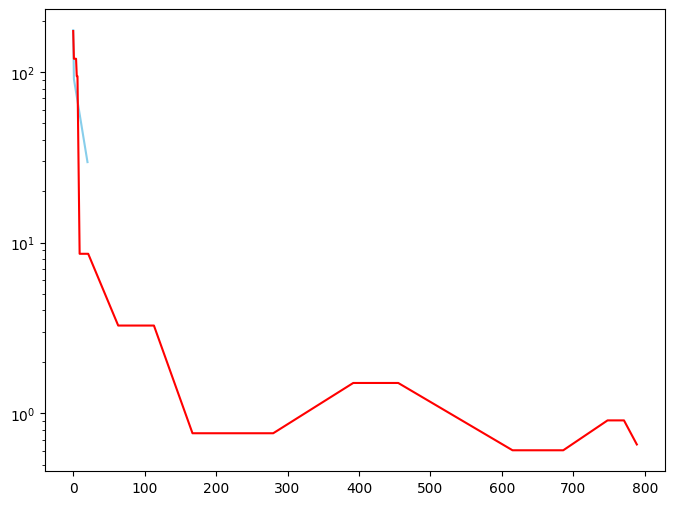

In [26]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


kmax = 1000

es = []
fs = []
min_f = np.Inf
for i in range(kmax):
    x = np.random.rand()*4-2
    y = np.random.rand()*4-2
    f = himmelblau(x, y)
    if f < min_f:
        min_f = f
        es += [i]
        fs += [f]

nes = []
nfs = []
x = np.random.rand()*4-2
y = np.random.rand()*4-2
xbest = x
ybest = y

for i in range(kmax):
    temp_x = x + np.random.randn()
    temp_y = y + np.random.randn()
    T = (kmax - i) / kmax
    fx = himmelblau(x, y)
    fxp = himmelblau(temp_x, temp_y)
    if fxp < fx or np.exp(-fxp-fx/T) > np.random.rand():
        x = temp_x
        y = temp_y
        if fx < himmelblau(xbest, ybest):
            xbest = x
            ybest = y

        nes += [i]
        nfs += [himmelblau(xbest, ybest)]



            
fig = plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.plot(es, fs, color= 'skyblue')
plt.plot(nes, nfs, color= 'red')


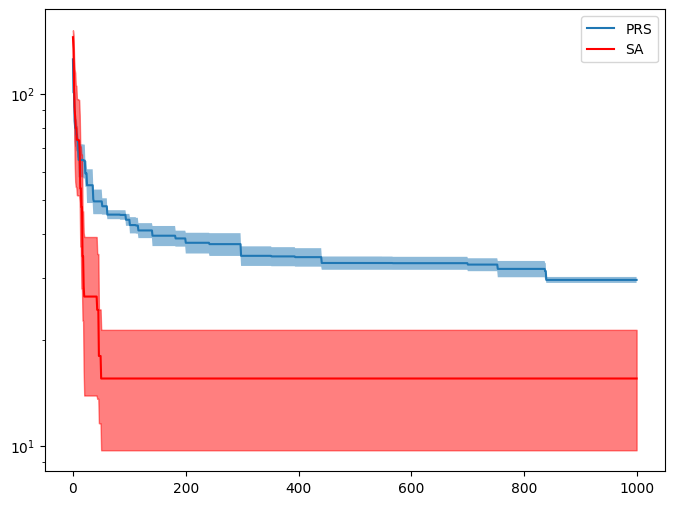

In [27]:
# %load solutions/3_sa.py
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

max_e = 1000
n_runs = 5

# Random Search
fs = np.zeros((n_runs, max_e))
for j in range(n_runs):
    min_f = np.Inf
    for i in range(max_e):
        x = np.random.rand()*4-2
        y = np.random.rand()*4-2
        f = himmelblau(x, y)
        if f < min_f:
            min_f = f
        fs[j, i] = min_f
fs_mean = np.mean(fs, 0)
fs_std = np.std(fs, 0)

# Simulated Annealing
sa_fs = np.zeros((n_runs, max_e))
for j in range(n_runs):
    x = np.random.randn(2)
    fx = himmelblau(x[0], x[1])
    fbest = fx
    xbest = np.copy(x)
    for i in range(max_e):
      xp = x + np.random.randn(2)
      T = (max_e - i) / max_e
      fxp = himmelblau(xp[0], x[1])
      if (fxp < fx) or (np.exp(-(fxp-fx)/T) > np.random.rand()):
        x = np.copy(xp)
        if fxp < fbest:
          fbest = fxp
          xbest = np.copy(xp)
      sa_fs[j, i] = fbest
sa_fs_mean = np.mean(sa_fs, 0)
sa_fs_std = np.std(sa_fs, 0)

# Plotting
ax_x = range(max_e)
fig = plt.figure(figsize=(8, 6))
plt.fill_between(ax_x, fs_mean+0.5*fs_std, fs_mean-0.5*fs_std, alpha=0.5);
plt.plot(ax_x, fs_mean, label='PRS')
plt.fill_between(ax_x, sa_fs_mean+0.5*sa_fs_std, sa_fs_mean-0.5*sa_fs_std, alpha=0.5, color='r');
plt.plot(ax_x, sa_fs_mean, color='r', label='SA')
plt.yscale('log')
plt.legend()
plt.show();



<div class="alert alert-info">
    <h3>Discussion</h3>
At the beginning of class, we discussed the travelling salesman problem. This is a discrete optimization problem where a position in the search space represents the list of cities in the order that they will be visited. What would be a good `neighbor` function for this problem?
</div>